In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("Grass",limit=30,output_dir = 'images')

[%] Downloading Images to /content/images/Grass


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/1/13/Green_Grass.JPG
[%] File Downloaded !

[%] Downloading Image #2 from http://upload.wikimedia.org/wikipedia/commons/d/da/Grass_closeup.JPG
[%] File Downloaded !

[%] Downloading Image #3 from https://eskipaper.com/images/grass-backgrounds-2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://theseamanmom.com/wp-content/uploads/2016/07/IMG_7686.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://thecreativeflux.files.wordpress.com/2013/04/img_4168.jpg
[Error]Invalid image, not saving http://thecreativeflux.files.wordpress.com/2013/04/img_4168.jpg

[!] Issue getting: http://thecreativeflux.files.wordpress.com/2013/04/img_4168.jpg
[!] Error:: Invalid image, not saving http://thecreativeflux.files.wordpress.com/2013/04/img_4168.jpg

[%] Downloading Image #5 from http://upload.wikim

In [ ]:
downloader.download("Stone",limit=30,output_dir = 'images')

[%] Downloading Images to /content/images/Stone


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.texturex.com/wp-content/uploads/2018/03/Stone-Texture-wall-large-rock-grey-image.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://artofidealism.files.wordpress.com/2012/01/stones.jpg
[!] Issue getting: http://artofidealism.files.wordpress.com/2012/01/stones.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from http://www.imageafter.com/dbase/textures/walls/b17poows056.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapers-all.com/uploads/posts/2017-06/29_stone.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/_pGKKSeIs0ow/TDIzNVN0L3I/AAAAAAAAA00/Pv_954RWIuM/s1600/river-stone.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.pixelstalk.net/wp-content/uploads/2016/10/Pebbles-stone-texture-wallpaper.jpg
[%] File Downloaded !

[%] Downloadin

In [ ]:
downloader.download("road",limit=30,output_dir = 'images')

[%] Downloading Images to /content/images/road


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://rvthing.files.wordpress.com/2010/10/road.jpg
[Error]Invalid image, not saving http://rvthing.files.wordpress.com/2010/10/road.jpg

[!] Issue getting: http://rvthing.files.wordpress.com/2010/10/road.jpg
[!] Error:: Invalid image, not saving http://rvthing.files.wordpress.com/2010/10/road.jpg

[%] Downloading Image #1 from https://weknowyourdreams.com/images/road/road-14.jpg
[!] Issue getting: https://weknowyourdreams.com/images/road/road-14.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)>
[%] Downloading Image #1 from http://fullhdpictures.com/wp-content/uploads/2015/04/Awesome-Road-Wallpapers.jpg
[!] Issue getting: http://fullhdpictures.com/wp-content/uploads/2015/04/Awesome-Road-Wallpapers.jpg
[!] Error:: <urlopen error [Errno -3] Temporary failure i

In [ ]:
# Preprocessing part
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize



In [ ]:
target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['Grass','Stone','road']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3, random_state = 42)

In [ ]:
#Classification algorithm
#We will be using SVM supervised learning algorithm
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001] ,'kernel':['rbf']}
]

svc = svm.SVC( probability = True )
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8888888888888888

In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 0, 1],
       [0, 8, 0],
       [1, 1, 8]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://images.unsplash.com/photo-1501854140801-50d01698950b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2600&q=80
(1548, 2600, 3)
PREDICTED OUTPUT: Grass Mountain


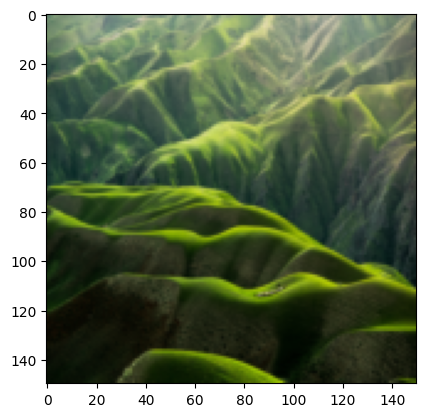

In [ ]:
#Testing a brand new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
if(y_out != "road"):
  print(f'PREDICTED OUTPUT: {y_out} Mountain')
else:
  print(f'PREDICTED OUTPUT: {y_out}')